In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('lr_ex.csv')
df

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556
...,...,...
295,296,200.555556
296,297,201.222222
297,298,201.888889
298,299,1.888889


In [22]:
X = df["X"].to_numpy().reshape(-1,1) # convert into numpy array and then reshape it to a single varibale 
y = df["Y"].to_numpy().reshape(-1,1) 
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test =train_test_split(X, y, test_size=0.33)
from sklearn.preprocessing import StandardScaler    #remove the mean and scale
sc_x = StandardScaler()
x_train =sc_x.fit_transform(x_train)
x_test =sc_x.fit_transform(x_test)


R2 Score =  0.8531667928583705
MSE =  458.34282327290384


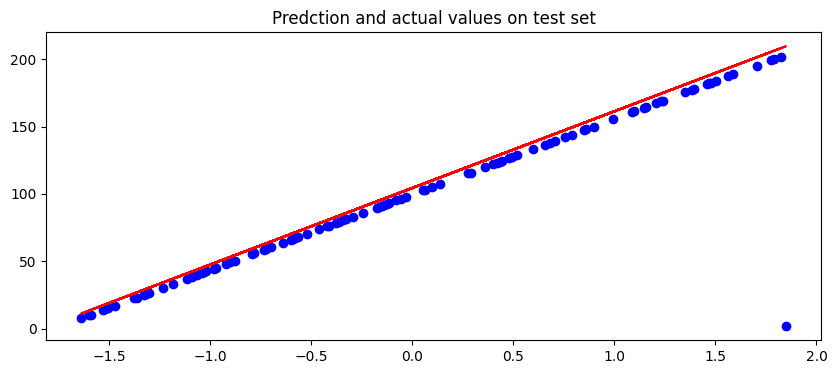

In [23]:
import sklearn as sk
from sklearn.linear_model import LinearRegression
mdl = LinearRegression()
mdl.fit(x_train, y_train)
y_pred = mdl.predict(x_test)
r2 = sk.metrics.r2_score(y_test , y_pred) # regression score function, best if 1
mse_test = sk.metrics.mean_squared_error(y_test,y_pred)
print('R2 Score = ',r2)
print('MSE = ',mse_test)

plt.figure(figsize=(10,4))
plt.title("Predction and actual values on test set")
plt.scatter(x_test,y_test, c="blue")
plt.plot(x_test,y_pred, c="red")
plt.show()

In [24]:
mdl.score(x_test,y_test) #accuracy test

0.8531667928583705

-----------------------------------------------------------------------------------------------------------------------------------------------------------

# Polynomial Regression

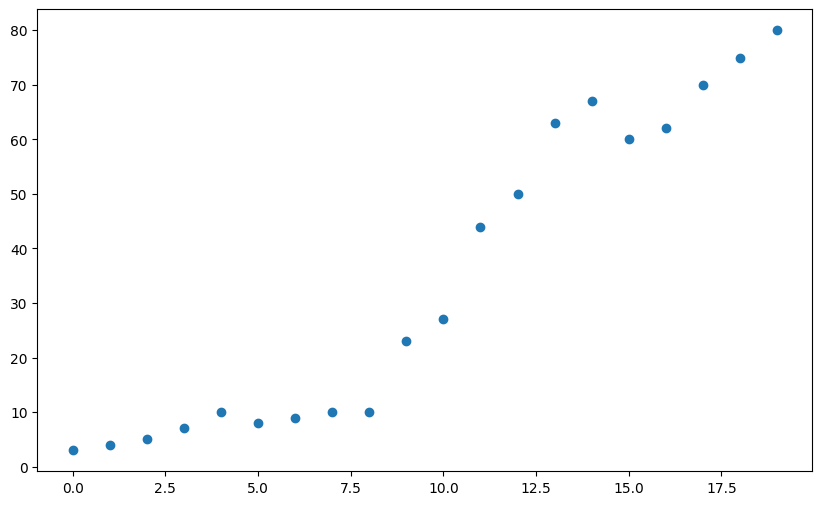

In [25]:
x = np.arange(0,20)
y= [3,4,5,7,10,8,9,10,10,23,27,44,50,63,67,60,62,70,75,80]
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.show()

In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(x.reshape(-1,1))
mdl.fit(poly_features,y)

LinearRegression()

In [27]:
y_predicted = mdl.predict(poly_features)

In [28]:
y_predicted

array([-1.22792208,  0.79668489,  3.10803144,  5.70611757,  8.59094327,
       11.76250854, 15.2208134 , 18.96585783, 22.99764183, 27.31616541,
       31.92142857, 36.81343131, 41.99217362, 47.4576555 , 53.20987697,
       59.248838  , 65.57453862, 72.18697881, 79.08615858, 86.27207792])

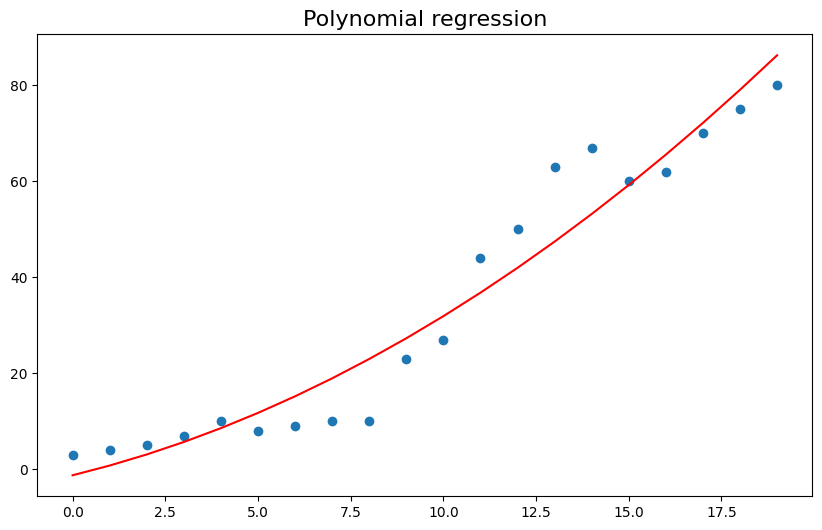

In [29]:
plt.figure(figsize=(10,6))
plt.title("Polynomial regression" ,size = 16)
plt.scatter(x,y)
plt.plot(x, y_predicted, c ="red")
plt.show()

# Lasso Regression

In [30]:
from sklearn.linear_model import Lasso,LassoCV
lasso_cv = LassoCV(alphas=None, cv =10 ,max_iter= 100000) #formula for lsso :  (  1 / ( 2 *n_sample))
lasso_cv.fit(x_train,y_train)

c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(cv=10, max_iter=100000)

In [31]:
alpha = lasso_cv.alpha_
alpha

0.056812840287645834

In [32]:
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(x_train,y_train)

Lasso(alpha=0.056812840287645834)

In [33]:
lasso.predict(x_test)

array([126.95969657, 201.26738201, 183.02822286, 166.81563695,
        30.3597055 , 128.98626981,  17.52474165,  41.16809611,
        71.5666947 , 181.00164962, 133.71494071, 141.82123366,
       187.08136934, 205.32052849,  62.78487733,  63.46040174,
        68.18907264,  96.56109799,  11.44502194, 172.89535666,
        97.2366224 , 108.04501301,  80.34851207,  97.91214681,
        48.59886466, 208.02262615, 193.16108906, 169.5177346 ,
        95.21004916,  81.02403648,  78.32193883, 144.52333132,
        87.77928062, 107.3694886 , 187.75689375,  34.41285198,
       102.6408177 ,  51.97648672,  60.08277968,  53.32753555,
        59.40725527,  42.51914494, 131.68836747,  90.48137827,
        18.20026607, 170.19325901, 152.62962427,  26.30655902,
       143.17228249,  72.24221911, 194.51213788, 128.3107454 ,
       205.99605291,  49.27438907, 129.66179423, 174.9219299 ,
        46.57229142, 124.93312334,  94.53452475, 183.70374727,
        83.05060972,  45.896767  , 188.43241817,  43.87

In [34]:
lasso.score(x_train,y_train)

0.9425889127135304

In [35]:
mse = np.mean((y_pred - y_test)**2)
mse

458.34282327290384

In [36]:
lasso.score(x_test,y_test)

0.8533317524223534

# Ridge Regression
Do not consider 0 in the data set, values might be near to the zero but not zero

In [37]:
from sklearn.linear_model import Ridge,RidgeCV
alphas = np.random.uniform(0,10,50)
ridge_cv = RidgeCV(alphas = alphas, cv = 10)
ridge_cv.fit(x_train,y_train)


RidgeCV(alphas=array([9.80834055, 9.58047323, 2.31263409, 0.62242342, 6.55494449,
       7.27884251, 7.40275756, 1.57484521, 5.61908647, 3.57740298,
       3.18067395, 4.34814708, 3.0020751 , 3.65465304, 1.18127552,
       0.05964784, 6.62422063, 2.70064531, 5.74078592, 8.37841041,
       5.38273307, 8.88726824, 9.60787775, 3.10638159, 1.27494986,
       6.88510947, 1.15731873, 9.86372464, 4.98286897, 9.00240348,
       7.54050526, 1.06369221, 8.20801658, 8.93707451, 5.80323932,
       1.3455164 , 2.54546731, 8.96092422, 4.94177509, 7.65703607,
       6.83679907, 8.86578506, 0.92282403, 5.34462394, 5.19270818,
       9.52327448, 7.25123131, 5.05672464, 7.78060936, 3.03572401]),
        cv=10)

In [38]:
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(x_train , y_train)

Ridge(alpha=0.0596478391992139)

In [39]:
ridge.score(x_train,y_train)

0.9425897723446056

In [40]:
ridge.score(x_test,y_test)

0.8532159467335108